In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Random Forest for 2010s

In [3]:
X = pd.read_csv(r"/content/drive/MyDrive/climate-wins-datasets/weather-cleaned.csv", index_col = False)
y = pd.read_csv(r"/content/drive/MyDrive/climate-wins-datasets/pleasant-weather.csv", index_col = False)

In [6]:
X.shape

(22950, 137)

In [7]:
y.shape

(22950, 16)

In [8]:
# Pick decades (2010s)
X_decade = X[(X['DATE'].astype(str).str[:4] >= '2010') & (X['DATE'].astype(str).str[:4] <= '2019')]
y_decade = y[(y['DATE'].astype(str).str[:4] >= '2010') & (y['DATE'].astype(str).str[:4] <= '2019')]

In [9]:
# Create a set of unique station names
stations = [col.split('_')[0] for col in X_decade.columns if '_' in col]
unique_stations = set(stations)
unique_stations

# Create a dictionary to store the frequency of entries for each station
station_frequencies = {}

for station in unique_stations:
    # Select columns that belong to the current station
    station_columns = [col for col in  X_decade.columns if col.startswith(station)]

    # Count non-missing entries across all columns for the station
    station_frequencies[station] =  X_decade[station_columns].notna().sum().sum()

# Print the frequency of entries for each station
print("Frequency of entries for each weather station:")
for station, freq in station_frequencies.items():
    print(f"{station}: {freq} entries")



Frequency of entries for each weather station:
LJUBLJANA: 32868 entries
BASEL: 32868 entries
DUSSELDORF: 32868 entries
BELGRADE: 32868 entries
VALENTIA: 32868 entries
SONNBLICK: 32868 entries
STOCKHOLM: 32868 entries
DEBILT: 32868 entries
BUDAPEST: 32868 entries
KASSEL: 32868 entries
OSLO: 32868 entries
MUNCHENB: 32868 entries
HEATHROW: 32868 entries
MAASTRICHT: 32868 entries
MADRID: 32868 entries


In [10]:
#drop unneeded columns
X_decade = X_decade.drop(['DATE', 'MONTH'], axis = 1)
y_decade = y_decade.drop(['DATE'], axis = 1)

In [11]:
X_decade.shape

(3652, 135)

In [12]:
y_decade.shape

(3652, 15)

In [13]:
X = X_decade
y = y_decade

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(np.array(X),np.array(y), random_state = 42)

In [14]:
# Create a RF classifier
clf = RandomForestClassifier(n_estimators = 100, random_state = 30)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=30)

In [17]:
# Perform predictions on the test dataset
y_pred = clf.predict(X_test)
# Get important metrics
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Precision Score: ", metrics.precision_score(y_test, y_pred, average = 'micro'))
print("Recall Score: ", metrics.recall_score(y_test, y_pred, average = 'micro'))
print("F1 Score: ", metrics.f1_score(y_test, y_pred, average = 'micro'))

Model Accuracy:  0.5848849945235487
Precision Score:  0.9043927648578811
Recall Score:  0.8866371120962635
F1 Score:  0.8954269267668692


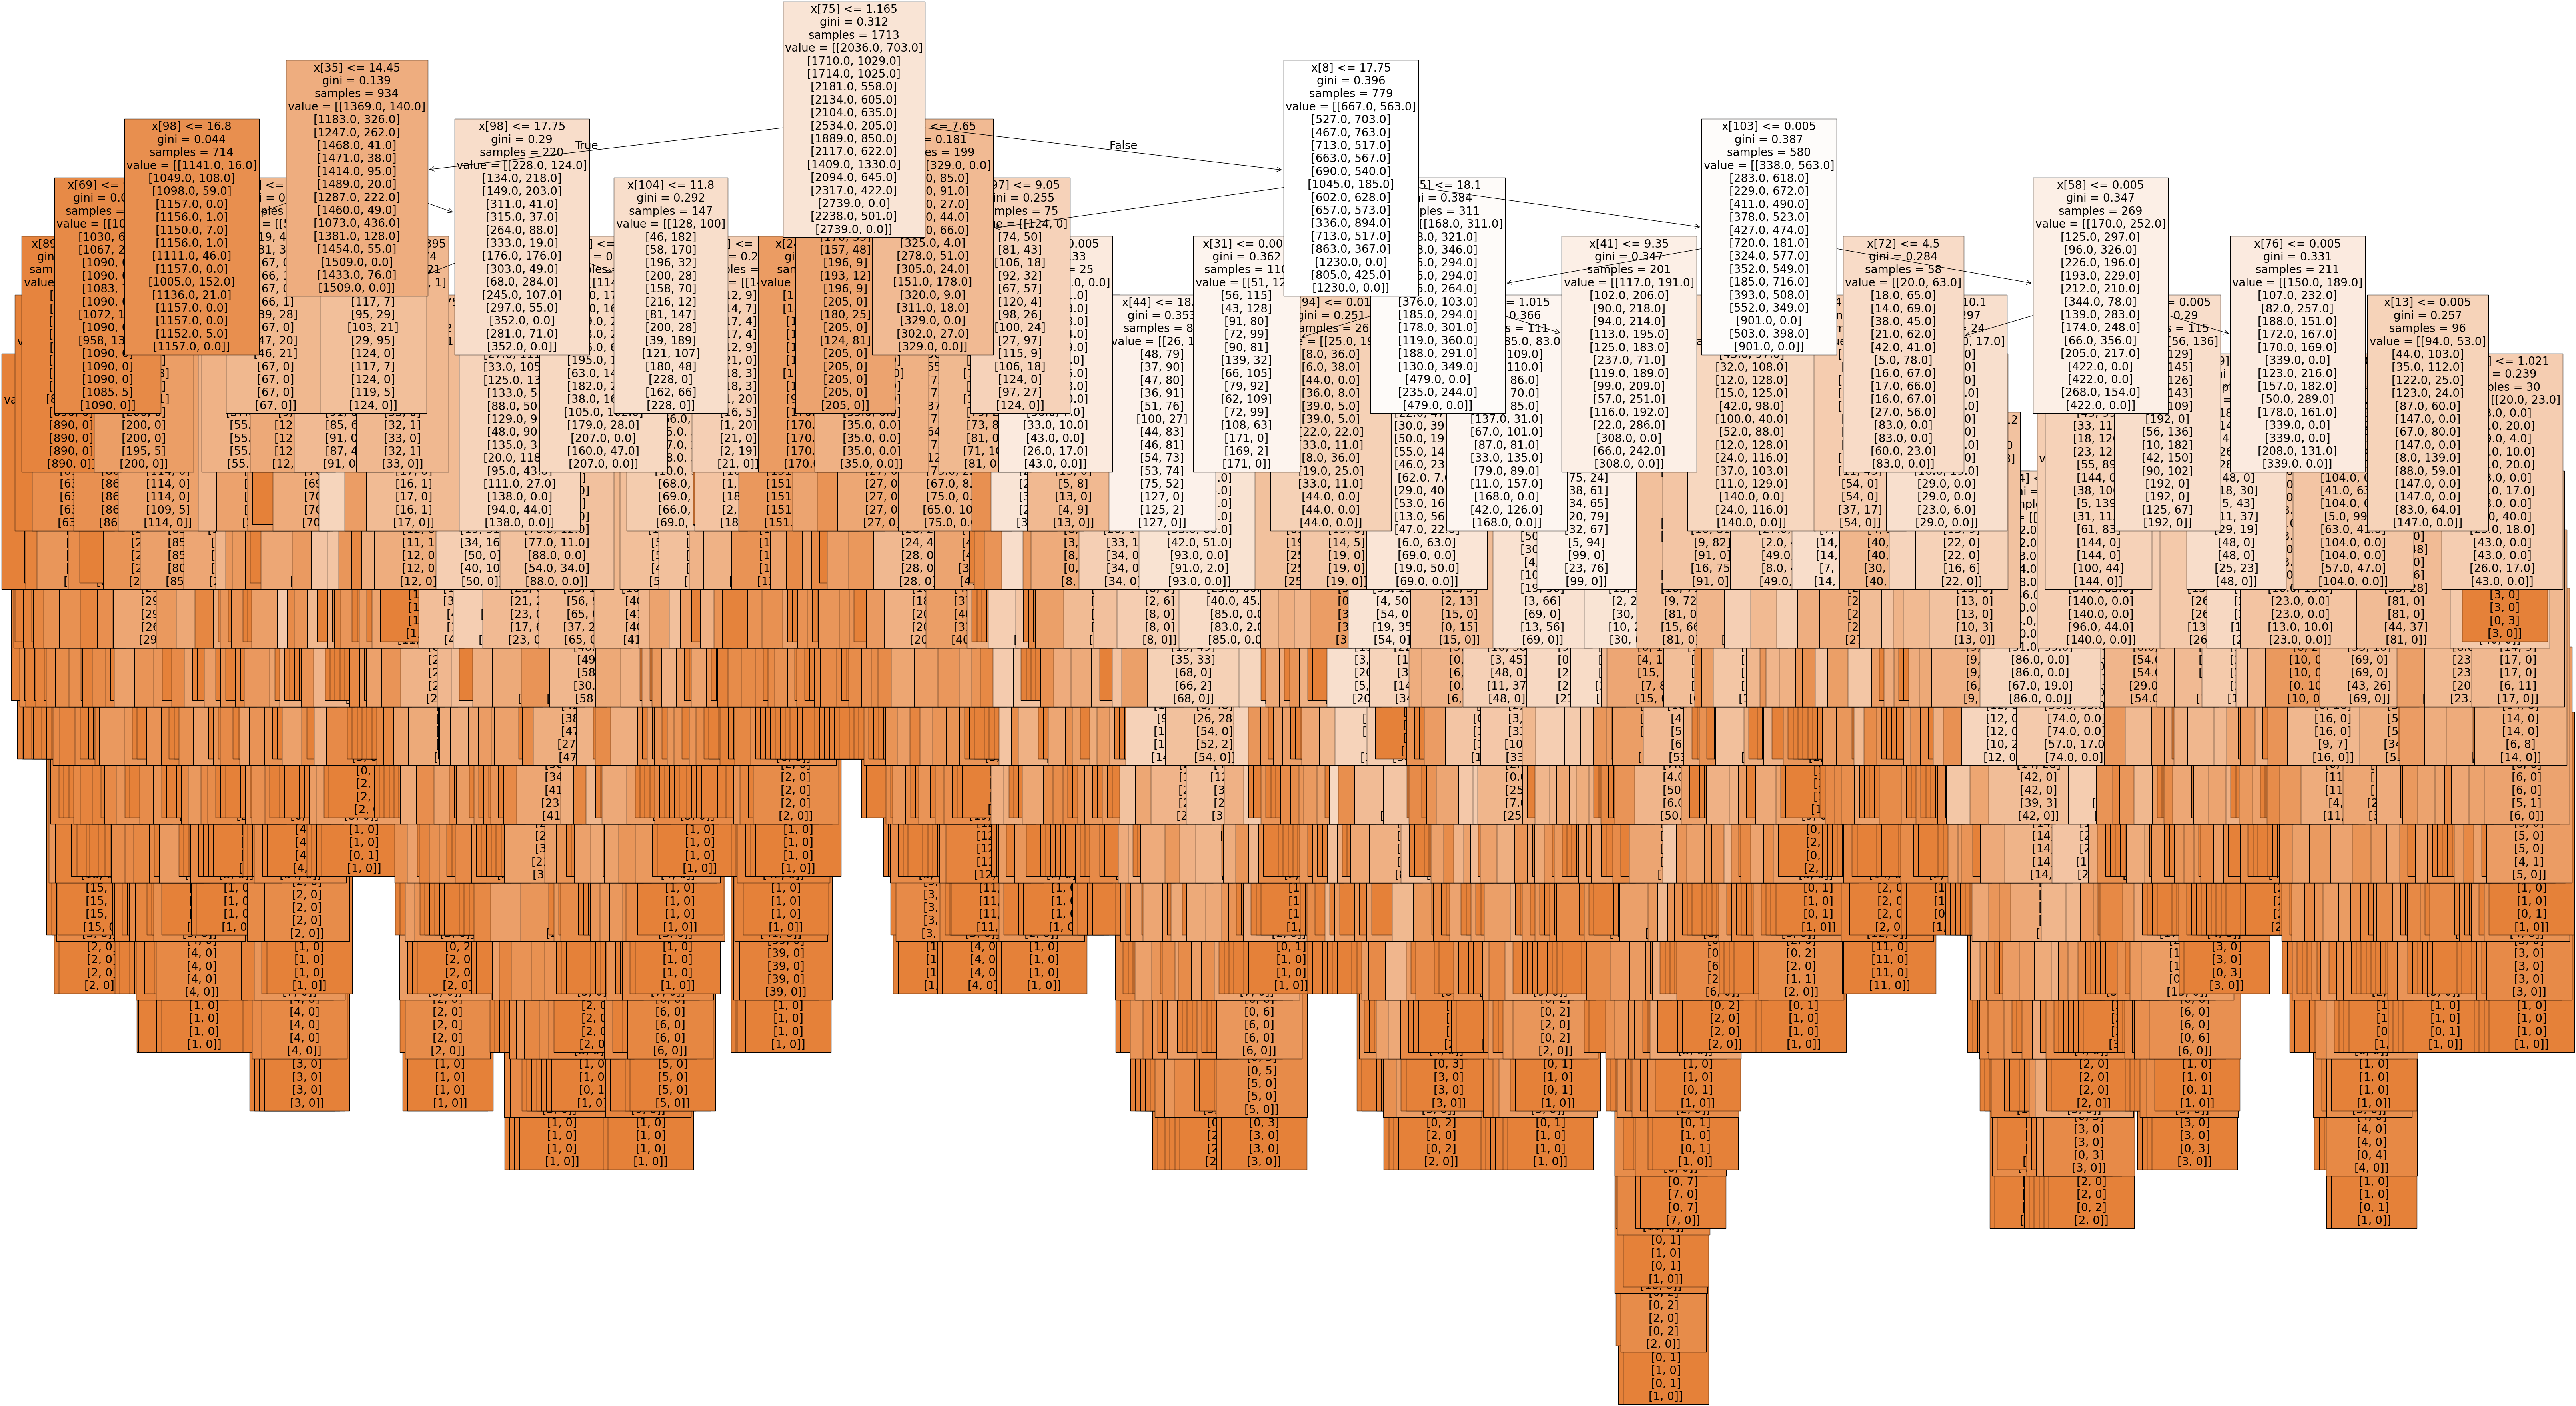

In [18]:
# Plot tree
fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[15], fontsize = 20, filled=True);
fig.show()

In [19]:
# Retrieve feature importances from the trained model
newarray = clf.feature_importances_

#Reshape
newarray = newarray.reshape(-1,15,9)
print(newarray.shape)

# Collapse this shape into one observation for each weather station
sumarray = np.sum(newarray[0], axis=1)

# Convert the set of unique stations to a list
unique_stations_list = list(unique_stations)

#get important values
important = pd.Series(sumarray, index = unique_stations_list)
important = important.sort_values(ascending = False)
important

(1, 15, 9)


,0
BUDAPEST,0.107529
OSLO,0.102650
BELGRADE,0.102516
LJUBLJANA,0.097028
VALENTIA,0.092854
DEBILT,0.084454
KASSEL,0.064594
MAASTRICHT,0.062493
MUNCHENB,0.058345
DUSSELDORF,0.054724


In [20]:
#proper df with station name and importance
df_importance = pd.DataFrame({
    'Weather Station': unique_stations_list,
    'Importance': sumarray
})

df_importance = df_importance.sort_values(by='Importance', ascending = False)

['LJUBLJANA', 'BASEL', 'DUSSELDORF', 'BELGRADE', 'VALENTIA', 'SONNBLICK', 'STOCKHOLM', 'DEBILT', 'BUDAPEST', 'KASSEL', 'OSLO', 'MUNCHENB', 'HEATHROW', 'MAASTRICHT', 'MADRID']


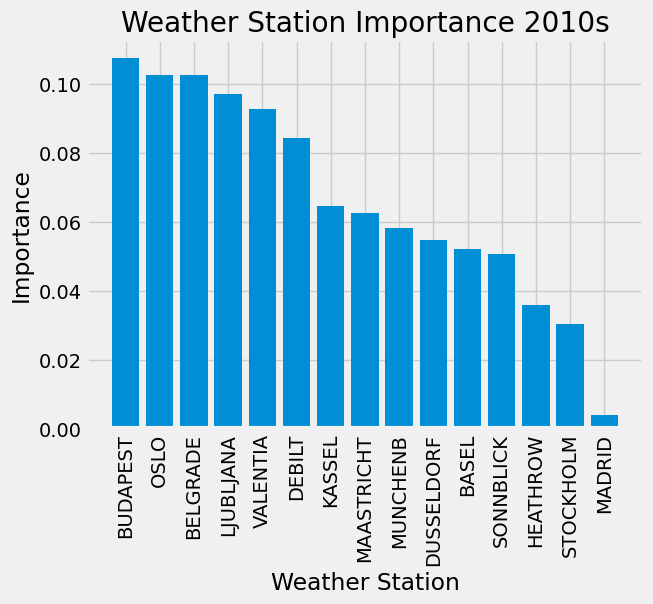

In [21]:
# Plot the results and save

%matplotlib inline

plt.style.use('fivethirtyeight')
print(unique_stations_list)

plt.bar(df_importance['Weather Station'], df_importance['Importance'], orientation = 'vertical')
plt.xticks(rotation='vertical')
plt.xlabel('Weather Station')
plt.ylabel('Importance')
plt.title('Weather Station Importance 2010s')


plt.show()